In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("data/spam_ham_dataset.csv")

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
df1=df.drop("Unnamed: 0",axis=1)

In [19]:
X=df1["text"]
y=df1["label_num"]
vectorizer = TfidfVectorizer(stop_words='english')

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
Xtrain_vectorized=vectorizer.fit_transform(Xtrain)
Xtest_vectorized=vectorizer.transform(Xtest)

In [45]:
X1=df1["text"]
y1=df1["label_num"]
vectorizer = TfidfVectorizer(stop_words='english')

Xtrain,Xtest,ytrain,ytest=train_test_split(X1,y1,test_size=0.2,random_state=42)
Xtrain_vectorized=vectorizer.fit_transform(Xtrain)
Xtest_vectorized=vectorizer.transform(Xtest)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=72)
model1 = KNeighborsClassifier(n_neighbors=73)
model.fit(Xtrain_vectorized,ytrain)
model.score(Xtest_vectorized,ytest)

0.9652173913043478

In [27]:
model1 = KNeighborsClassifier(n_neighbors=73)
model1.fit(Xtrain_vectorized,ytrain)
model1.score(Xtest_vectorized,ytest)

0.9671497584541063

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(model1,X_vectorized,y,cv=5,scoring="accuracy")

NameError: name 'X_vectorized' is not defined

In [48]:
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay
Xvec=vectorizer.fit_transform(X)
RocCurveDisplay.from_estimator(model1,Xvec,y)

ValueError: X has 50140 features, but KNeighborsClassifier is expecting 44934 features as input.

## We'll use a pipeline so that we can use cross val score,roc curve etc 

In [46]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline(steps=[("tf",TfidfVectorizer(stop_words='english')),("model",KNeighborsClassifier(n_neighbors=73))])
pipeline.fit(Xtrain,ytrain)

,steps,"[('tf', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [47]:
pipeline.score(Xtest,ytest)

0.9671497584541063

In [36]:
cross_val_score(pipeline,X,y,cv=5,scoring="accuracy").mean()

np.float64(0.9557151533839786)

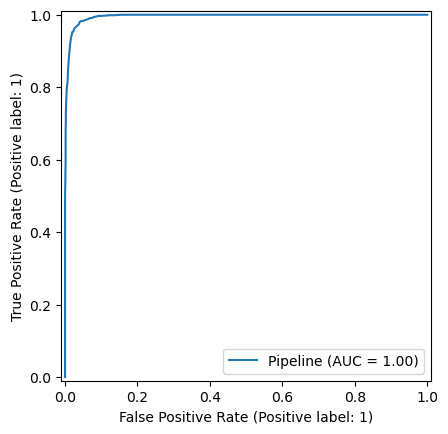

In [37]:
RocCurveDisplay.from_estimator(pipeline,X,y)

In [42]:
from sklearn.metrics import roc_auc_score


# Predict probabilities for both classes
y_proba = pipeline.predict_proba(Xtest)

# Get probabilities for the positive class (usually class 1)
positive_class_proba = y_proba[:, 1]

# Compute ROC AUC
roc_auc = roc_auc_score(ytest, positive_class_proba)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9958924776685096


In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,pipeline.predict(Xtest))

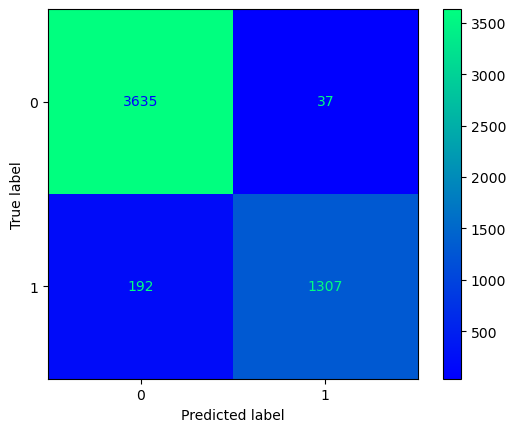

In [59]:
ConfusionMatrixDisplay.from_estimator(pipeline,X,y,cmap="winter");


In [60]:
# false positives =37 ,false negatives=192


ValueError: could not convert string to float: 'ham'